# Fractales aleatorios

<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/f/fa/Fractal_Crown_of_morgoth2_5600x4200.jpg" width="400px" height="125px" />

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/8/80/Super-volcano_Tierazon_fractal_Tiera4414.jpg" width="400px" height="125px" />


**Referencias:**
- http://fractalfoundation.org/resources/what-are-fractals/
- https://georgemdallas.wordpress.com/2014/05/02/what-are-fractals-and-why-should-i-care/
- https://en.wikipedia.org/wiki/Barnsley_fern
- http://www.home.aone.net.au/~byzantium/ferns/fractal.html

Antes que nada, ¿qué son fractales?

___
## 1. Fractales

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/2/21/Mandel_zoom_00_mandelbrot_set.jpg" width="400px" height="125px" />

- La geometría fractal es un campo de las matemáticas que tiene lugar a partir de los años setenta, y fue desarrollada principalmente por [Benoit Mandelbrot](https://es.wikipedia.org/wiki/Beno%C3%AEt_Mandelbrot).

- La geometría elemental que aprendimos en la escuela se trataba de estudiar (y hacer) formas o figuras. Pues bien, la geometría fractal no es distinta.

- Mientras que en geometría clásica las formas son suaves (círculos, triángulos, etcétera), las formas que produce la geometría fractal es tosca e infinitamente compleja.

Bueno, ¿y cuál es su importancia?
1. El proceso por el cual se obtienen formas fractales es impresionantemente simple y completamente diferente al seguido en geometría clásica. Mientras la geometría clásica se usan fórmulas para definir una forma, la geometría fractal usa iteración. Básicamente, podríamos decir que los fractales son imágenes de sistemas dinámicos.

2. Las formas fractales se parecen mucho a formas encontradas en la naturaleza. Este impresionante hecho es difícil de ignorar. Como sabemos no existen círculos perfectos en la naturaleza, ni cuadrados perfectos. No es solo eso, el solo mirar los árboles, ríos o montañas, y no se encuentra una forma que sea descrita por una fórmula. Sin embargo, usando fórmulas simples iteradas muchas veces, la geometría fractal puede modelar esos fenómenos con alta precisión. Si puedes usar matemáticas simples para modelar el mundo, vas por buen camino.


<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Fractal_canopy.svg/1200px-Fractal_canopy.svg.png" width="400px" height="125px" />

___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/e/ee/Sa-fern.jpg" width="400px" height="125px" />

La figura de la derecha (planta verde) corresponde a un helecho. El matemático británico [Michael Barnsley](https://en.wikipedia.org/wiki/Michael_Barnsley) fue quien primero describió un fractal que representa impresionantemente bien estas plantas, en su libro *'Fractals Everywhere'*.

## 2. Fractal helecho de Barnsley
El helecho de Barnsley es un fractal que usa cuatro transformaciones afines para generar los nuevos puntos. En la escogencia de cuál transformación usar para generar el siguiente punto es donde entra el componente probabilístico.

Este fractal se puede describir de la siguiente manera:

$$\left[\begin{array}{c}x_{k+1}\\ y_{k+1}\end{array}\right]=\left[\begin{array}{cc}a_i & b_i \\ c_i & d_i\end{array}\right]\left[\begin{array}{c}x_k\\ y_k\end{array}\right]+\left[\begin{array}{c}e_i\\f_i\end{array}\right],$$

donde $a_i$, $b_i$, $c_i$, $d_i$, $e_i$ y $f_i$ son coeficientes que dependen de la variable aleatoria $i\in\left\lbrace 0,1,2,3\right\rbrace$. Las condiciones iniciales son $x_0=y_0=0$.

Las probabilidades de ocurrencia de cada valor de $i$ son $P\left\lbrace i=0\right\rbrace=p_0=0.01$, $P\left\lbrace i=1\right\rbrace=p_1=0.85$, $P\left\lbrace i=2\right\rbrace=p_2=0.07$ y $P\left\lbrace i=3\right\rbrace=p_3=0.07$ (notar que la suma de las probabilidades es 1).

Todas las anteriores constantes se resume en la siguiente tabla (matriz):

In [1]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np

In [2]:
# Matriz de Barnsley
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['ai', 'bi', 'ci', 'di', 'ei', 'fi', 'pi', 'Porción generada'], dtype='float')
df.index.name = "$i$"

df['ai'] = [0.0, 0.85, 0.2, -0.15]
df['bi'] = [0.0, 0.04, -0.26, 0.28]
df['ci'] = [0.0, -0.04, 0.23, 0.26]
df['di'] = [0.16, 0.85, 0.22, 0.24]
df['ei'] = [0.0, 0.0, 0.0, 0.0]
df['fi'] = [0.0, 1.6, 1.6, 0.44]
df['pi'] = [0.01, 0.85, 0.07, 0.07]
df['Porción generada'] = ['Tallo', 'Follaje cada vez más pequeño', 'Ramas izquierda', 'Ramas derecha']

df.round(2)

,ai,bi,ci,di,ei,fi,pi,Porción generada
$i$,,,,,,,,
0,0.00,0.00,0.00,0.16,0.0,0.00,0.01,Tallo
1,0.85,0.04,-0.04,0.85,0.0,1.60,0.85,Follaje cada vez más pequeño
2,0.20,-0.26,0.23,0.22,0.0,1.60,0.07,Ramas izquierda
3,-0.15,0.28,0.26,0.24,0.0,0.44,0.07,Ramas derecha


Con la anterior descripción, generemos el helecho de Barnsley con un código en python...

In [4]:
# Importar librerías para graficar y de números aleatorios
import matplotlib.pyplot as plt
import random

In [5]:
# Matriz de Barnsley
Mat_Barnsley = df.iloc[:,:-1].values
Mat_Barnsley

array([[ 0.  ,  0.  ,  0.  ,  0.16,  0.  ,  0.  ,  0.01],
       [ 0.85,  0.04, -0.04,  0.85,  0.  ,  1.6 ,  0.85],
       [ 0.2 , -0.26,  0.23,  0.22,  0.  ,  1.6 ,  0.07],
       [-0.15,  0.28,  0.26,  0.24,  0.  ,  0.44,  0.07]])

In [8]:
#help choices
random.choices?
random.choices([0,1,2,3],[0.01,0.85,0.07,0.07])

[1]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


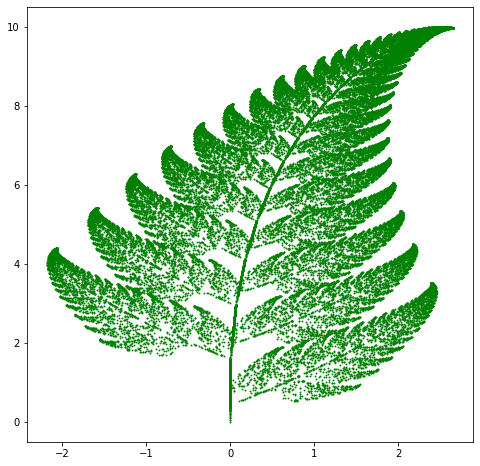

In [9]:
# Punto inicial
x = [0]
y = [0]

# Valores de i con su probabilidad
seq = [0,1,2,3]
prob = Mat_Barnsley[:,-1]
a = Mat_Barnsley[:,0]
b = Mat_Barnsley[:,1]
c = Mat_Barnsley[:,2]
d = Mat_Barnsley[:,3]
e = Mat_Barnsley[:,4]
f = Mat_Barnsley[:,5]

# Graficamos
for k in range(50000):
    i = random.choices(seq, prob)
    x.append(a[i]*x[k] + b[i]*y[k] + e[i])
    y.append(c[i]*x[k] + d[i]*y[k] + f[i])
    
plt.figure(figsize=(8,8)) 
plt.scatter(x,y,c='g',s=0.8)
plt.show()

### 2.1 Mutaciones

Jugando con los coeficientes de la transformación, es posible crear mutaciones del helecho.

#### Mutación Cyclosorus
Un experimentador dió con una tabla de coeficientes que produce otro helecho que se ve muy parecido a la naturaleza. La tabla es la siguiente:

In [10]:
i = np.arange(0,4)

df = pd.DataFrame(index=i,columns=['ai', 'bi', 'ci', 'di', 'ei', 'fi', 'pi', 'Porción generada'], dtype='float')
df.index.name = "$i$"

df['ai'] = [0.0, 0.95, 0.035, -0.04]
df['bi'] = [0.0, 0.005, -0.2, 0.2]
df['ci'] = [0.0, -0.005, 0.16, 0.16]
df['di'] = [0.25, 0.93, 0.04, 0.04]
df['ei'] = [0.0, -0.002, -0.09, 0.083]
df['fi'] = [-0.4, 0.5, 0.02, 0.12]
df['pi'] = [0.02, 0.84, 0.07, 0.07]
df['Porción generada'] = ['Tallo', 'Follaje cada vez más pequeño', 'Ramas izquierda', 'Ramas derecha']

df.round(3)

,ai,bi,ci,di,ei,fi,pi,Porción generada
$i$,,,,,,,,
0,0.000,0.000,0.000,0.25,0.000,-0.40,0.02,Tallo
1,0.950,0.005,-0.005,0.93,-0.002,0.50,0.84,Follaje cada vez más pequeño
2,0.035,-0.200,0.160,0.04,-0.090,0.02,0.07,Ramas izquierda
3,-0.040,0.200,0.160,0.04,0.083,0.12,0.07,Ramas derecha


La actividad consiste en generar el helecho mutante con los coeficientes de esta nueva tabla.

In [11]:
# Matriz Cyclosorus
Mat_Cyclosorus = df.iloc[:,:-1].values
Mat_Cyclosorus

array([[ 0.   ,  0.   ,  0.   ,  0.25 ,  0.   , -0.4  ,  0.02 ],
       [ 0.95 ,  0.005, -0.005,  0.93 , -0.002,  0.5  ,  0.84 ],
       [ 0.035, -0.2  ,  0.16 ,  0.04 , -0.09 ,  0.02 ,  0.07 ],
       [-0.04 ,  0.2  ,  0.16 ,  0.04 ,  0.083,  0.12 ,  0.07 ]])

/Users/user/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


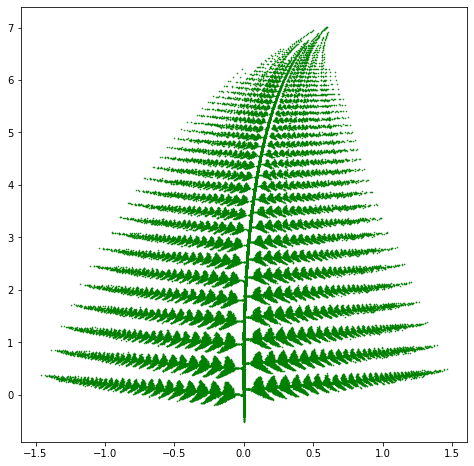

In [12]:
# Punto inicial
x = [0]
y = [0]

# Valores de i con su probabilidad
seq = [0,1,2,3]
prob = Mat_Cyclosorus[:,-1]
a = Mat_Cyclosorus[:,0]
b = Mat_Cyclosorus[:,1]
c = Mat_Cyclosorus[:,2]
d = Mat_Cyclosorus[:,3]
e = Mat_Cyclosorus[:,4]
f = Mat_Cyclosorus[:,5]

# Graficamos
for k in range(100000):
    i = random.choices(seq,prob)
    x.append(a[i]*x[k] + b[i]*y[k] + e[i])
    y.append(c[i]*x[k] + d[i]*y[k] + f[i])
    
plt.figure(figsize=(8,8)) 
plt.scatter(x,y,c='g',s=0.3)
plt.show()

#### Mutación Culcita
Un experimentador dió con una tabla de coeficientes que produce otro helecho que se ve muy parecido a la naturaleza. La tabla es la siguiente:

In [13]:
i = np.arange(0,4)

df = pd.DataFrame(index=i,columns=['ai', 'bi', 'ci', 'di', 'ei', 'fi', 'pi', 'Porción generada'], dtype='float')
df.index.name = "$i$"

df['ai'] = [0.0, 0.85, 0.09, -0.09]
df['bi'] = [0.0, 0.02, -0.28, 0.28]
df['ci'] = [0.0, -0.02, 0.3, 0.3]
df['di'] = [0.25, 0.83, 0.11, 0.09]
df['ei'] = [0.0, 0.0, 0.0, 0.0]
df['fi'] = [-0.14, 1.0, 0.6, 0.7]
df['pi'] = [0.02, 0.84, 0.07, 0.07]
df['Porción generada'] = ['Tallo', 'Follaje cada vez más pequeño', 'Ramas izquierda', 'Ramas derecha']

df.round(3)

,ai,bi,ci,di,ei,fi,pi,Porción generada
$i$,,,,,,,,
0,0.00,0.00,0.00,0.25,0.0,-0.14,0.02,Tallo
1,0.85,0.02,-0.02,0.83,0.0,1.00,0.84,Follaje cada vez más pequeño
2,0.09,-0.28,0.30,0.11,0.0,0.60,0.07,Ramas izquierda
3,-0.09,0.28,0.30,0.09,0.0,0.70,0.07,Ramas derecha


**Actividad** La actividad consiste en generar el helecho mutante con los coeficientes de esta nueva tabla.

Hacer un nuevo archivo de jupyter (extensión .ipynb) con el nombre *T7_PrimerNombrePrimerApellido* y subirlo en el enlace habilitado.

In [14]:
Mat_Culcita = df.iloc[:,:-1].values
Mat_Culcita

array([[ 0.  ,  0.  ,  0.  ,  0.25,  0.  , -0.14,  0.02],
       [ 0.85,  0.02, -0.02,  0.83,  0.  ,  1.  ,  0.84],
       [ 0.09, -0.28,  0.3 ,  0.11,  0.  ,  0.6 ,  0.07],
       [-0.09,  0.28,  0.3 ,  0.09,  0.  ,  0.7 ,  0.07]])

In [15]:
x = [0]
y = [0]

# Valores de i con su probabilidad


# Graficamos



## 3. Otra aplicación (elegible para proyecto)
Un paisaje fractal es una superficie generada usando un algoritmo estocástico diseñado para producir un comportamiento fractal que mimetiza la apariencia de un terreno natural. En otras palabras, el resultado de este procedimiento no es una superficie fractal determinística, sino una superficie aleatoria que exhibe comportamiento fractal.

<img style="float: left; margin: 0px 0px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/6/6d/Animated_fractal_mountain.gif" width="300px" height="100px" />

<img style="float: center; margin: 0px 0px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/6/6e/FractalLandscape.jpg" width="300px" height="100px" />

<img style="float: right; margin: 0px 0px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/8/8b/Fractal_terrain_texture.jpg" width="300px" height="100px" />

**Referencia:**
- https://en.wikipedia.org/wiki/Fractal_landscape

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga.
</footer>